In [2]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt

In [48]:
num = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
stn = [0]*15
for i in range(15):
    stn[i] = pd.read_csv(f'stn/stn{num[i]}.csv')

In [49]:
for i in range(15):
    stn[i]['Datetime'] = pd.to_datetime(stn[i]['Datetime'])
stn[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105264 entries, 0 to 105263
Data columns (total 28 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      105264 non-null  int64         
 1   Time      105264 non-null  int64         
 2   stn       105264 non-null  int64         
 3   lon       105264 non-null  float64       
 4   lat       105264 non-null  float64       
 5   uv        105264 non-null  float64       
 6   band1     105264 non-null  float64       
 7   band2     105264 non-null  float64       
 8   band3     105264 non-null  float64       
 9   band4     105264 non-null  float64       
 10  band5     105264 non-null  float64       
 11  band6     105264 non-null  float64       
 12  band7     105264 non-null  float64       
 13  band8     105264 non-null  float64       
 14  band9     105264 non-null  float64       
 15  band10    105264 non-null  float64       
 16  band11    105264 non-null  float64    

In [4]:
for i in range(15):
    stn[i].loc[stn[i]['Time'] <= 550,'uv']=0
    stn[i].loc[stn[i]['Time'] >=2000,'uv']=0
    stn[i] = stn[i].replace(-999, np.NaN)

In [5]:
stn[0]

,Date,Time,stn,lon,lat,uv,band1,band2,band3,band4,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,Datetime
0,20200101,0,13,126.16,33.3,0.0,0.00000,0.00000,0.00000,-0.00075,...,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.0,0,2020-01-01 00:00:00
1,20200101,10,13,126.16,33.3,0.0,-0.00057,0.00000,0.00119,-0.00015,...,267.39961,267.63692,266.66849,258.21621,166.67178,38.96359,-9.50910,71.0,0,2020-01-01 00:10:00
2,20200101,20,13,126.16,33.3,0.0,0.00000,0.00000,-0.00030,0.00030,...,268.27856,268.19710,267.20654,258.38663,167.94722,38.96359,-9.50910,71.0,0,2020-01-01 00:20:00
3,20200101,30,13,126.16,33.3,0.0,-0.00057,0.00000,-0.00030,0.00030,...,268.44652,268.07856,267.50047,258.67009,168.93011,38.96359,-9.50910,71.0,0,2020-01-01 00:30:00
4,20200101,40,13,126.16,33.3,0.0,-0.00113,-0.00057,-0.00119,-0.00030,...,268.64762,268.58556,267.34496,258.50010,169.53722,38.96359,-9.50910,71.0,0,2020-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105259,20211231,2310,13,126.16,33.3,0.0,-0.00113,0.00057,0.00000,0.00000,...,249.40735,247.69928,246.54564,242.35466,156.05597,38.96359,-8.88492,71.0,0,2021-12-31 23:10:00
105260,20211231,2320,13,126.16,33.3,0.0,0.00000,-0.00057,-0.00060,-0.00105,...,251.95026,249.51067,247.96883,243.12601,158.01080,38.96359,-8.88492,71.0,0,2021-12-31 23:20:00
105261,20211231,2330,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00089,-0.00015,...,252.96278,250.84725,248.64059,243.73861,159.91946,38.96359,-8.88492,71.0,0,2021-12-31 23:30:00
105262,20211231,2340,13,126.16,33.3,0.0,-0.00057,-0.00057,0.00030,-0.00015,...,252.03346,250.09823,248.36829,243.54213,161.76646,38.96359,-8.88492,71.0,0,2021-12-31 23:40:00


## 1월1일 9:40 모든 stn데이터 채우기(평균으로)

In [6]:
stn[0].loc[(stn[0]['Time']==940) & (stn[0]['Date']==20200101)]

,Date,Time,stn,lon,lat,uv,band1,band2,band3,band4,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,Datetime
58,20200101,940,13,126.16,33.3,1.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.55904,38.96359,2.11853,71.0,0,2020-01-01 09:40:00


In [7]:
for i in range(15):
    for j in range(17):
        stn[i].iloc[58,6+j] = (stn[i].iloc[57,6+j] + stn[i].iloc[59,6+j]) / 2

In [8]:
stn[0].loc[(stn[0]['Time']==940) & (stn[0]['Date']==20200101)]

,Date,Time,stn,lon,lat,uv,band1,band2,band3,band4,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,Datetime
58,20200101,940,13,126.16,33.3,1.2,0.089225,0.075845,0.05394,0.13474,...,276.85946,277.167225,275.894475,263.165805,70.584325,38.96359,2.11853,71.0,0,2020-01-01 09:40:00


## stn 10분 단위로 나누기

In [9]:
time_series = pd.Series(stn[0]['Time'])
time_index = time_series.value_counts().index

In [10]:
type(time_index)

pandas.core.indexes.numeric.Int64Index

In [11]:
'''Stn_Time = [0]*144
for i in range(144):
    Stn_Time[i] = stn[0].groupby('Time').get_group(time_index[i])'''

"Stn_Time = [0]*144\nfor i in range(144):\n    Stn_Time[i] = stn[0].groupby('Time').get_group(time_index[i])"

In [12]:
Stn_Time = [0]*15
for i in range(15):
    Stn_Time[i] = [0]*144
    for j in range(144):
        Stn_Time[i][j] = stn[i].groupby('Time').get_group(time_index[j])

In [13]:
Stn_Time[0][23]

,Date,Time,stn,lon,lat,uv,band1,band2,band3,band4,...,band13,band14,band15,band16,solarza,sateza,esr,height,landtype,Datetime
76,20200101,1240,13,126.16,33.3,4.0,0.25719,0.24294,0.23484,0.25960,...,281.22755,280.83065,278.60424,264.44725,56.26852,38.96359,5.30439,71.0,0,2020-01-01 12:40:00
220,20200102,1240,13,126.16,33.3,1.1,0.40844,0.40261,0.41067,0.44065,...,264.05190,264.11410,263.59689,255.68594,56.18000,38.96359,5.31319,71.0,0,2020-01-02 12:40:00
364,20200103,1240,13,126.16,33.3,2.6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.08410,38.96359,5.32287,71.0,0,2020-01-03 12:40:00
508,20200104,1240,13,126.16,33.3,3.2,0.12463,0.10265,0.05931,0.10264,...,286.28487,286.43450,284.20755,267.65256,55.98085,38.96359,5.33345,71.0,0,2020-01-04 12:40:00
652,20200105,1240,13,126.16,33.3,3.0,0.18468,0.17279,0.14752,0.16354,...,275.16948,271.86548,267.37954,256.15036,55.87030,38.96359,5.34491,71.0,0,2020-01-05 12:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104620,20211227,1240,13,126.16,33.3,2.2,0.45829,0.46534,0.48100,0.50858,...,263.57224,263.74177,263.38172,254.82929,56.59931,38.96359,5.27116,71.0,0,2021-12-27 12:40:00
104764,20211228,1240,13,126.16,33.3,1.0,0.40278,0.40717,0.39845,0.46310,...,264.52869,264.73127,264.00808,255.35577,56.54816,38.96359,5.27543,71.0,0,2021-12-28 12:40:00
104908,20211229,1240,13,126.16,33.3,2.7,0.17845,0.19788,0.10371,0.20948,...,281.21304,280.41252,278.08617,263.34728,56.48948,38.96359,5.28061,71.0,0,2021-12-29 12:40:00
105052,20211230,1240,13,126.16,33.3,2.6,0.24699,0.23723,0.11593,0.19646,...,270.12422,269.82462,267.84525,257.43651,56.42329,38.96359,5.28669,71.0,0,2021-12-30 12:40:00


## Stn 시간보간

In [14]:
'''for i in range(144):
    Stn_Time[i] = Stn_Time[i].set_index('Datetime')
    Stn_Time[i]['uv'] = Stn_Time[i]['uv'].interpolate(method='time')'''

"for i in range(144):\n    Stn_Time[i] = Stn_Time[i].set_index('Datetime')\n    Stn_Time[i]['uv'] = Stn_Time[i]['uv'].interpolate(method='time')"

In [15]:
for i in range(15):
    for j in range(144):
        Stn_Time[i][j] = Stn_Time[i][j].set_index('Datetime')
        # uv 보간
        Stn_Time[i][j]['uv'] = Stn_Time[i][j]['uv'].interpolate(method='time')
        # band1~16 보간
        Stn_Time[i][j]['band1'] = Stn_Time[i][j]['band1'].interpolate(method='time')
        Stn_Time[i][j]['band2'] = Stn_Time[i][j]['band2'].interpolate(method='time')
        Stn_Time[i][j]['band3'] = Stn_Time[i][j]['band3'].interpolate(method='time')
        Stn_Time[i][j]['band4'] = Stn_Time[i][j]['band4'].interpolate(method='time')
        Stn_Time[i][j]['band5'] = Stn_Time[i][j]['band5'].interpolate(method='time')
        Stn_Time[i][j]['band6'] = Stn_Time[i][j]['band6'].interpolate(method='time')
        Stn_Time[i][j]['band7'] = Stn_Time[i][j]['band7'].interpolate(method='time')
        Stn_Time[i][j]['band8'] = Stn_Time[i][j]['band8'].interpolate(method='time')
        Stn_Time[i][j]['band9'] = Stn_Time[i][j]['band9'].interpolate(method='time')
        Stn_Time[i][j]['band10'] = Stn_Time[i][j]['band10'].interpolate(method='time')
        Stn_Time[i][j]['band11'] = Stn_Time[i][j]['band11'].interpolate(method='time')
        Stn_Time[i][j]['band12'] = Stn_Time[i][j]['band12'].interpolate(method='time')
        Stn_Time[i][j]['band13'] = Stn_Time[i][j]['band13'].interpolate(method='time')
        Stn_Time[i][j]['band14'] = Stn_Time[i][j]['band14'].interpolate(method='time')
        Stn_Time[i][j]['band15'] = Stn_Time[i][j]['band15'].interpolate(method='time')
        Stn_Time[i][j]['band16'] = Stn_Time[i][j]['band16'].interpolate(method='time')
        

In [16]:
Stn_Time[8][120]['band1'].isna().value_counts()

False    731
Name: band1, dtype: int64

In [17]:
'''
fig, ax = plt.subplots()
ax.plot(Stn_Time[120]['uv'])
ax.set_xlabel('Date')
ax.set_ylabel('UV')
ax.set_title('UV Trend stn13')
fig.autofmt_xdate()
plt.show()'''

"\nfig, ax = plt.subplots()\nax.plot(Stn_Time[120]['uv'])\nax.set_xlabel('Date')\nax.set_ylabel('UV')\nax.set_title('UV Trend stn13')\nfig.autofmt_xdate()\nplt.show()"

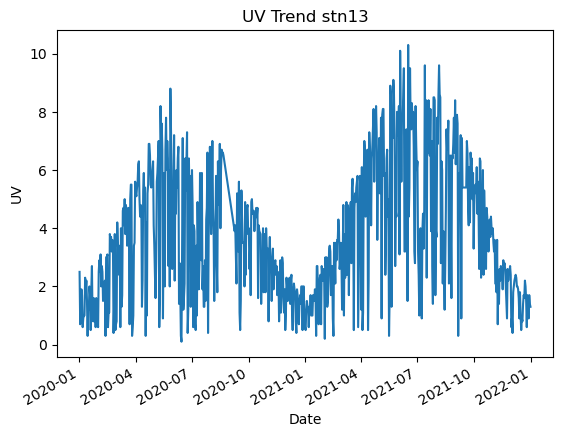

In [18]:
fig, ax = plt.subplots()
ax.plot(Stn_Time[0][120]['uv'])
ax.set_xlabel('Date')
ax.set_ylabel('UV')
ax.set_title('UV Trend stn13')
fig.autofmt_xdate()
plt.show()

## 나눈 데이터 통합 + 정렬

In [19]:
'''result = Stn_Time[0]
for i in range(1,144):
    result = pd.concat([result,Stn_Time[i]])'''

'result = Stn_Time[0]\nfor i in range(1,144):\n    result = pd.concat([result,Stn_Time[i]])'

In [20]:
result = [0]*15
for i in range(15):
    result[i] = Stn_Time[i][0]
    for j in range(1,144):
        result[i] = pd.concat([result[i],Stn_Time[i][j]])

In [21]:
'''result = result.sort_index()
result'''

'result = result.sort_index()\nresult'

In [22]:
for i in range(15):
    result[i] = result[i].sort_index()

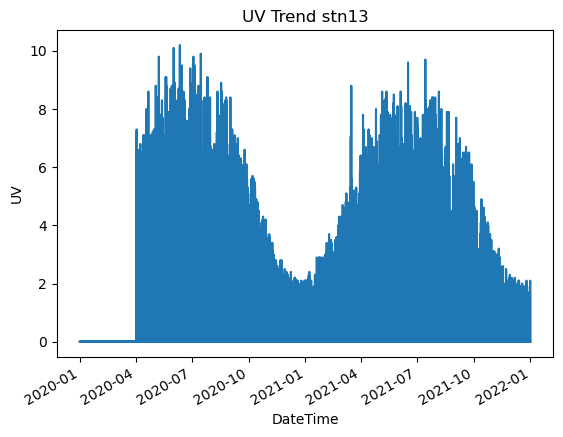

In [47]:
fig, ax = plt.subplots()
ax.plot(result[2]['uv'])
ax.set_xlabel('DateTime')
ax.set_ylabel('UV')
ax.set_title('UV Trend stn13')
fig.autofmt_xdate()
plt.show()

## stn별 데이터(결측치 처리 완료) csv파일로 저장

In [36]:
'''for i in range(15):
    result[i].to_csv(f'결측처리데이터\stn{i+1}.csv')'''

In [3]:
num = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15"]
stn = [0]*15
for i in range(15):
    stn[i] = pd.read_csv(f'결측처리데이터/stn{num[i]}.csv')

In [4]:
stn_all = pd.DataFrame()
stn_all = pd.concat([stn[0], stn[1], stn[2], stn[3], stn[4], stn[5], stn[6], stn[7], stn[8],\
                    stn[9], stn[10], stn[11], stn[12], stn[13], stn[14]])

In [5]:
stn_all = stn_all.sort_index()
stn_all

,Datetime,Date,Time,stn,lon,lat,uv,band1,band2,band3,...,band12,band13,band14,band15,band16,solarza,sateza,esr,height,landtype
0,2020-01-01 00:00:00,20200101,0,13,126.16000,33.30000,0.0,0.00000,0.00000,0.00000,...,250.75924,269.97608,269.70811,268.61702,259.10334,165.17963,38.96359,-9.50910,71.00,0
0,2020-01-01 00:00:00,20200101,0,165,126.38121,34.81689,0.0,0.00000,0.00000,-0.00030,...,246.81037,264.84497,264.41440,263.14810,255.27793,164.27585,40.67788,-9.46744,38.00,3
0,2020-01-01 00:00:00,20200101,0,159,129.03203,35.10468,0.0,-0.00057,-0.00057,-0.00030,...,251.55840,273.80950,273.80042,273.72736,261.02336,165.46158,40.96396,-9.51364,69.56,3
0,2020-01-01 0:00,20200101,0,108,126.96500,37.57100,0.0,0.00000,0.00000,-0.00089,...,241.24994,258.33982,258.18692,257.58363,250.50021,162.48279,43.77999,-9.37761,85.50,3
0,2020-01-01 00:00:00,20200101,0,132,126.33000,36.54000,0.0,-0.00057,0.00000,-0.00060,...,242.90744,259.90613,260.22621,259.83901,252.63718,162.98337,42.62037,-9.40485,47.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105263,2021-12-31 23:50:00,20211231,2350,105,128.89098,37.75147,0.0,-0.00057,-0.00057,-0.00060,...,241.58022,263.42956,263.45704,263.13011,253.51155,162.07968,43.95463,-8.90375,26.04,3
105263,2021-12-31 23:50:00,20211231,2350,156,126.89158,35.17294,0.0,0.00000,0.00000,0.00000,...,242.90744,260.33453,260.00405,259.18646,250.92709,162.84572,41.04849,-8.87987,72.38,3
105263,2021-12-31 23:50:00,20211231,2350,13,126.16000,33.30000,0.0,-0.00057,0.00000,-0.00030,...,238.21420,250.73274,248.96109,247.69447,243.08210,163.53009,38.96359,-8.88492,71.00,0
105263,2021-12-31 23:50,20211231,2350,143,128.65295,35.87797,0.0,-0.00057,0.00000,-0.00179,...,243.25301,262.74829,262.68732,262.09935,252.93608,163.38559,41.82617,-8.95347,53.50,3


In [6]:
#stn_all
print(stn_all.isnull().sum())

Datetime    0
Date        0
Time        0
stn         0
lon         0
lat         0
uv          0
band1       0
band2       0
band3       0
band4       0
band5       0
band6       0
band7       0
band8       0
band9       0
band10      0
band11      0
band12      0
band13      0
band14      0
band15      0
band16      0
solarza     0
sateza      0
esr         0
height      0
landtype    0
dtype: int64


In [7]:
#stn_all.to_csv(f'결측처리데이터\stn_all.csv')

stn3, 10의 uv데이터가 1월1일부터 결측이 있어서 다음해 동일 일자로 복붙